In [1]:
import pandas as pd
import plotnine as pn
import pingouin as pg

In [2]:
def make_groups(with_moon, without_moon, name):
    res = list(zip(with_moon, ["With MOON"] * len(with_moon)))
    res += list(zip(without_moon, ["Without MOON"] * len(without_moon)))
    return pd.DataFrame(res, columns=[name, "Group"])

## First failing cell

In [3]:
ff_with_moon = [13,12,15,20,15,5,20,13,9,14]
ff_without_moon = [4,1,9,13,4,9,16,8,11,0,8]

pg.mwu(ff_with_moon, ff_without_moon)

,U-val,alternative,p-val,RBC,CLES
MWU,91.0,two-sided,0.012086,-0.654545,0.827273


In [4]:
ff = make_groups(ff_with_moon, ff_without_moon, 'Number of cells')
ff

,Number of cells,Group
0,13,With MOON
1,12,With MOON
2,15,With MOON
3,20,With MOON
4,15,With MOON
5,5,With MOON
6,20,With MOON
7,13,With MOON
8,9,With MOON
9,14,With MOON


In [5]:
ff.groupby('Group').describe()

Number of cells                                               \
                       count       mean       std  min    25%   50%   75%   
Group                                                                       
With MOON               10.0  13.600000  4.526465  5.0  12.25  13.5  15.0   
Without MOON            11.0   7.545455  4.926736  0.0   4.00   8.0  10.0   

                    
               max  
Group               
With MOON     20.0  
Without MOON  16.0

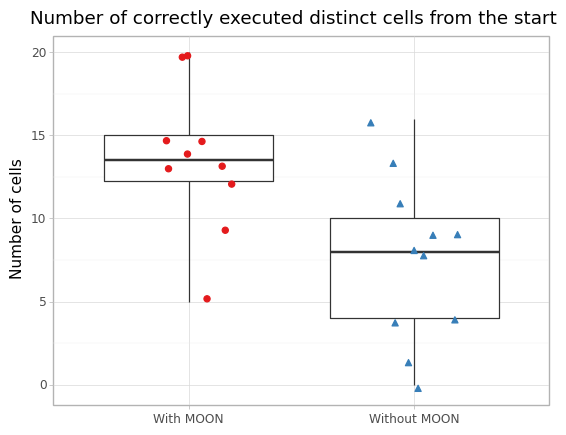

<ggplot: (8780784024158)>

In [6]:
p = pn.ggplot(ff, pn.aes('Group', 'Number of cells')) + pn.geom_boxplot(coef=500) + pn.geom_jitter(ff, pn.aes(colour = "Group", shape="Group"), size=2, show_legend=False, width=0.2) + pn.theme_light() + pn.scale_color_brewer(type="qual", palette=6) + pn.xlab("") + pn.ggtitle("Number of correctly executed distinct cells from the start")
#p.save(filename = '../first_fail.png', height=5, width=5, units = 'in')
p


## Completeness

In [7]:
cp_with_moon = [20,12,20,20,18,15,20,20,15,15]
cp_without_moon = [13,15,15,20,15,18,20,19,16,20,15]

pg.mwu(cp_with_moon, cp_without_moon)

,U-val,alternative,p-val,RBC,CLES
MWU,63.0,two-sided,0.579504,-0.145455,0.572727


In [8]:
cp = make_groups(cp_with_moon, cp_without_moon, 'Number of actions')
cp

,Number of actions,Group
0,20,With MOON
1,12,With MOON
2,20,With MOON
3,20,With MOON
4,18,With MOON
5,15,With MOON
6,20,With MOON
7,20,With MOON
8,15,With MOON
9,15,With MOON


In [9]:
cp.groupby('Group').describe()

Number of actions                                               \
                         count       mean       std   min   25%   50%   75%   
Group                                                                         
With MOON                 10.0  17.500000  2.990726  12.0  15.0  19.0  20.0   
Without MOON              11.0  16.909091  2.547726  13.0  15.0  16.0  19.5   

                    
               max  
Group               
With MOON     20.0  
Without MOON  20.0

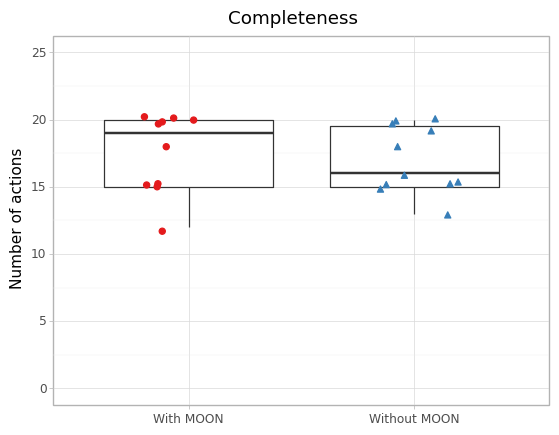

<ggplot: (8780783889035)>

In [10]:
p = pn.ggplot(cp, pn.aes('Group', 'Number of actions')) + pn.geom_boxplot(coef=500) + pn.geom_jitter(cp, pn.aes(colour = "Group", shape="Group"), size=2, show_legend=False, width=0.2) + pn.ylim(0, 25) + pn.theme_light() + pn.scale_color_brewer(type="qual", palette=6) + pn.xlab("") + pn.ggtitle("Completeness")
#p.save(filename = '../completeness.png', height=5, width=5, units = 'in')
p

## Fitness

In [11]:
fit_with_moon = [0.967,1.0,0.979,1.0,0.956,0.933,1.0,0.991,0.95,0.959]
fit_without_moon = [0.662,0.72,0.603,0.585,0.705,0.74,0.8,0.293,0.708,0.648,0.525]

pg.mwu(fit_with_moon, fit_without_moon)

,U-val,alternative,p-val,RBC,CLES
MWU,110.0,two-sided,0.000122,-1.0,1.0


In [12]:
fit = make_groups(fit_with_moon, fit_without_moon, 'fitness')
fit

,fitness,Group
0,0.967,With MOON
1,1.000,With MOON
2,0.979,With MOON
3,1.000,With MOON
4,0.956,With MOON
5,0.933,With MOON
6,1.000,With MOON
7,0.991,With MOON
8,0.950,With MOON
9,0.959,With MOON


In [13]:
fit.groupby('Group').describe()

fitness                                                         
               count      mean       std    min      25%    50%      75%  max
Group                                                                        
With MOON       10.0  0.973500  0.024024  0.933  0.95675  0.973  0.99775  1.0
Without MOON    11.0  0.635364  0.137546  0.293  0.59400  0.662  0.71400  0.8

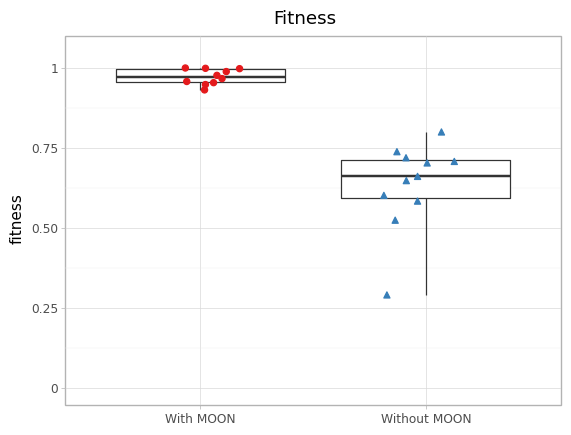

<ggplot: (8780783892679)>

In [14]:
p = pn.ggplot(fit, pn.aes('Group', 'fitness')) + pn.geom_boxplot(coef=500) + pn.geom_jitter(fit, pn.aes(colour = "Group", shape="Group"), size=2, show_legend=False, width=0.2) + pn.ylim(0, 1.05) + pn.theme_light() + pn.scale_color_brewer(type="qual", palette=6) + pn.xlab("") + pn.ggtitle("Fitness")
#p.save(filename = '../fitness.png', height=5, width=5, units = 'in')
p

# Grades

In [15]:
grades_with_moon = [9.50, 12,15,18,11,16,18,10.50,18.5]
grades_without_moon = [11,19,17.5,20,9,11,12,11,8,8.5,9]

pg.mwu(grades_with_moon, grades_without_moon)

,U-val,alternative,p-val,RBC,CLES
MWU,64.0,two-sided,0.285129,-0.292929,0.646465


In [16]:
grades = make_groups(grades_with_moon, grades_without_moon, 'grades')
grades.groupby('Group').describe()
grades

,grades,Group
0,9.5,With MOON
1,12.0,With MOON
2,15.0,With MOON
3,18.0,With MOON
4,11.0,With MOON
5,16.0,With MOON
6,18.0,With MOON
7,10.5,With MOON
8,18.5,With MOON
9,11.0,Without MOON


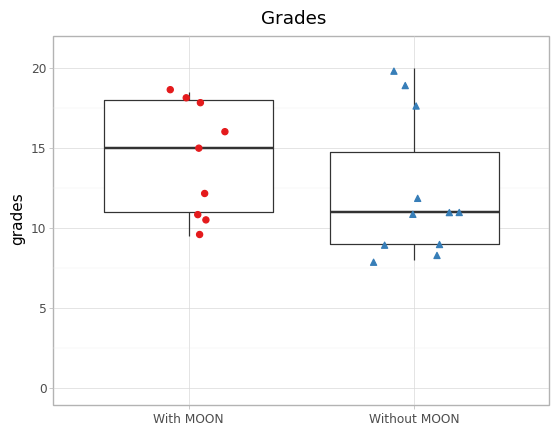

<ggplot: (8780783944394)>

In [17]:
p = pn.ggplot(grades, pn.aes('Group', 'grades')) + pn.geom_boxplot(coef=500) + pn.geom_jitter(grades, pn.aes(colour = "Group", shape="Group"), size=2, show_legend=False, width=0.2) + pn.ylim(0, 21) + pn.theme_light() + pn.scale_color_brewer(type="qual", palette=6) + pn.xlab("") + pn.ggtitle("Grades")
#p.save(filename = '../grades.png', height=5, width=5, units = 'in')
p